<a href="https://colab.research.google.com/github/Meeta14/Shala-Assignments/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [0]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
df = attrition_data
df.isna()
df = df.dropna()
print('Size after dropping null value: {}'.format(df.shape))
print('Size before dropping null value: {}'.format(attrition_data.shape))

Size after dropping null value: (1028, 34)
Size before dropping null value: (1028, 34)


In [0]:
X = attrition_data.drop(['Attrition', 'ID'], axis = 1)
y = attrition_data['Attrition']

In [0]:
# from xgboos5
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
X = pd.get_dummies(X, columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"], 
prefix=["BusinessTravel_is","Department_is","EducationField_is","Gender_is","JobRole_is","MaritalStatus_is","OverTime_is"])

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state=123)

In [0]:
test_scores, train_scores = [], []

for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train1, y_train1) # print(rfc)

    train_predictions = rfc.predict(X_train1)
    test_predictions = rfc.predict(X_test1)

    train_scores.append(round(accuracy_score(y_train1, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test1, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.91, 0.91, 0.95, 0.95, 0.96, 0.98, 0.99, 1.0]
The testing scores were: [0.79, 0.84, 0.81, 0.83, 0.82, 0.83, 0.84, 0.84]


In [0]:
rfc = RandomForestClassifier(n_estimators=20, random_state=1111)
rfc.fit(X_train1, y_train1) # print(rfc)

train_predictions = rfc.predict(X_train1)
test_predictions = rfc.predict(X_test1)

train_scores.append(round(accuracy_score(y_train1, train_predictions), 2))
test_scores.append(round(accuracy_score(y_test1, test_predictions), 2))

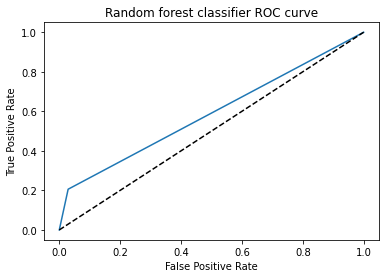

In [0]:
# probs = xgb_clf.predict_proba(X_test)  
# test_predictions = test_predictions[:, 1] 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve  
fper, tper, thresholds = roc_curve(y_test1, test_predictions) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest classifier ROC curve')
# show the plot
plt.show()

In [0]:
print(confusion_matrix(y_test1, test_predictions))
print("="*60)
print(classification_report(y_test1, test_predictions))

[[167   5]
 [ 27   7]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       172
           1       0.58      0.21      0.30        34

    accuracy                           0.84       206
   macro avg       0.72      0.59      0.61       206
weighted avg       0.82      0.84      0.81       206



In [0]:
Xd = attrition_data.drop(['Attrition', 'ID'], axis = 1)
yd = attrition_data['Attrition']

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Xd['BusinessTravel'] = le.fit_transform(Xd['BusinessTravel'])
Xd['Department'] = le.fit_transform(Xd['Department'])
Xd['EducationField'] = le.fit_transform(Xd['EducationField'])
Xd['Gender'] = le.fit_transform(Xd['Gender'])
Xd['JobRole'] = le.fit_transform(Xd['JobRole'])                   
Xd['MaritalStatus'] = le.fit_transform(Xd['MaritalStatus'])
Xd['OverTime'] = le.fit_transform(Xd['OverTime']) 
                   
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xd, yd, test_size = 0.2, random_state=123)

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train2, y_train2)
y_pred_dt = clf.predict(X_test2)
score = clf.score(X_test2, y_test2)

In [0]:
print('Depth of the Decision Tree is:-')
print(clf.get_depth())
print('Accuracy of Decision Tree regression classifier on test set: {:.4f}'.format(clf.score(X_test2, y_test2)))

Depth of the Decision Tree is:-
16
Accuracy of Decision Tree regression classifier on test set: 0.7816


In [0]:
print(confusion_matrix(y_test2, y_pred_dt))
print("="*60)
print(classification_report(y_test2, y_pred_dt))

[[143  29]
 [ 16  18]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       172
           1       0.38      0.53      0.44        34

    accuracy                           0.78       206
   macro avg       0.64      0.68      0.65       206
weighted avg       0.81      0.78      0.79       206



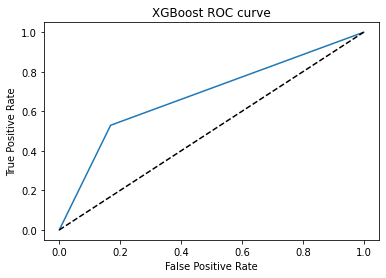

In [0]:
fper, tper, thresholds = roc_curve(y_test2, y_pred_dt) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np

In [0]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predictions1 = xgb_clf.predict(X_train1)
# accuracy score
accuracy = accuracy_score(y_train1, predictions1)
print(np.round(accuracy*100, 2), '%')

87.23 %


In [0]:
predictions1 = xgb_clf.predict(X_test1)
print(confusion_matrix(y_test1, predictions1))
print("="*60)
print(classification_report(y_test1, predictions1))

[[164   8]
 [ 26   8]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       172
           1       0.50      0.24      0.32        34

    accuracy                           0.83       206
   macro avg       0.68      0.59      0.61       206
weighted avg       0.80      0.83      0.81       206



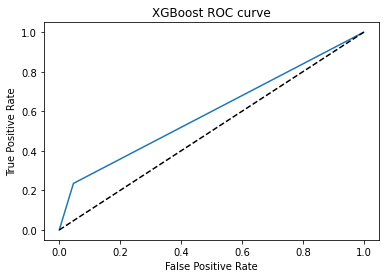

In [0]:
fper, tper, thresholds = roc_curve(y_test1, predictions1) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

In [0]:
print('XGBClassifier gives the best prediction with accuracy 87.23%')

XGBClassifier gives the best prediction with accuracy 87.23%


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
